# Problem Statement

Car Data-
Here, we will apply k-means clustering for grouping the similar cars in one cluster

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Cars Data file into Python DataFrame and view top 10 rows.

Get the data from here - https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/

In [2]:
names=['mpg' ,'cylinders' ,'displacement' ,'horsepower' ,'weight' ,'acceleration' ,'model year' ,'origin' ,'car name']
cars=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original",names=names,delim_whitespace=True)
cars.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
5,15.0,8.0,429.0,198.0,4341.0,10.0,70.0,1.0,ford galaxie 500
6,14.0,8.0,454.0,220.0,4354.0,9.0,70.0,1.0,chevrolet impala
7,14.0,8.0,440.0,215.0,4312.0,8.5,70.0,1.0,plymouth fury iii
8,14.0,8.0,455.0,225.0,4425.0,10.0,70.0,1.0,pontiac catalina
9,15.0,8.0,390.0,190.0,3850.0,8.5,70.0,1.0,amc ambassador dpl


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [3]:
cars.dtypes

mpg             float64
cylinders       float64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year      float64
origin          float64
car name         object
dtype: object

In [4]:
cars.shape

(406, 9)

In [5]:
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.50,23.0,29.000,46.6
cylinders,406.0,5.475369,1.712160,3.0,4.00,4.0,8.000,8.0
displacement,406.0,194.779557,104.922458,68.0,105.00,151.0,302.000,455.0
horsepower,400.0,105.082500,38.768779,46.0,75.75,95.0,130.000,230.0
weight,406.0,2979.413793,847.004328,1613.0,2226.50,2822.5,3618.250,5140.0
acceleration,406.0,15.519704,2.803359,8.0,13.70,15.5,17.175,24.8
model year,406.0,75.921182,3.748737,70.0,73.00,76.0,79.000,82.0
origin,406.0,1.568966,0.797479,1.0,1.00,1.0,2.000,3.0


In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       406 non-null float64
displacement    406 non-null float64
horsepower      400 non-null float64
weight          406 non-null float64
acceleration    406 non-null float64
model year      406 non-null float64
origin          406 non-null float64
car name        406 non-null object
dtypes: float64(8), object(1)
memory usage: 28.6+ KB


# Q3 Check for missing value check, incorrect data and perform imputation with mean, median, mode as necessary.

In [7]:
cars.isnull().sum()

mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [8]:
def impute_mpg(cols):
    cmpg = cols[0]
    Cyl = cols[1]
    
    if pd.isnull(cmpg):

        if Cyl == 4:
            return (cars.mpg.where(cars.cylinders==Cyl).mode()).astype(float)

        elif Cyl == 8:
            return (cars.mpg.where(cars.cylinders==Cyl).mode()).astype(float)
    
    else:
        return cmpg

cars['mpg'] = cars[['mpg','cylinders']].apply(impute_mpg,axis=1)

cars['mpg'] = cars['mpg'].astype(float)

cars['horsepower']= cars['horsepower'].fillna(cars['horsepower'].median())

In [9]:
#cars.fillna(cars.median(axis=0),inplace=True)

In [10]:
cars.head(20)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
5,15.0,8.0,429.0,198.0,4341.0,10.0,70.0,1.0,ford galaxie 500
6,14.0,8.0,454.0,220.0,4354.0,9.0,70.0,1.0,chevrolet impala
7,14.0,8.0,440.0,215.0,4312.0,8.5,70.0,1.0,plymouth fury iii
8,14.0,8.0,455.0,225.0,4425.0,10.0,70.0,1.0,pontiac catalina
9,15.0,8.0,390.0,190.0,3850.0,8.5,70.0,1.0,amc ambassador dpl


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences

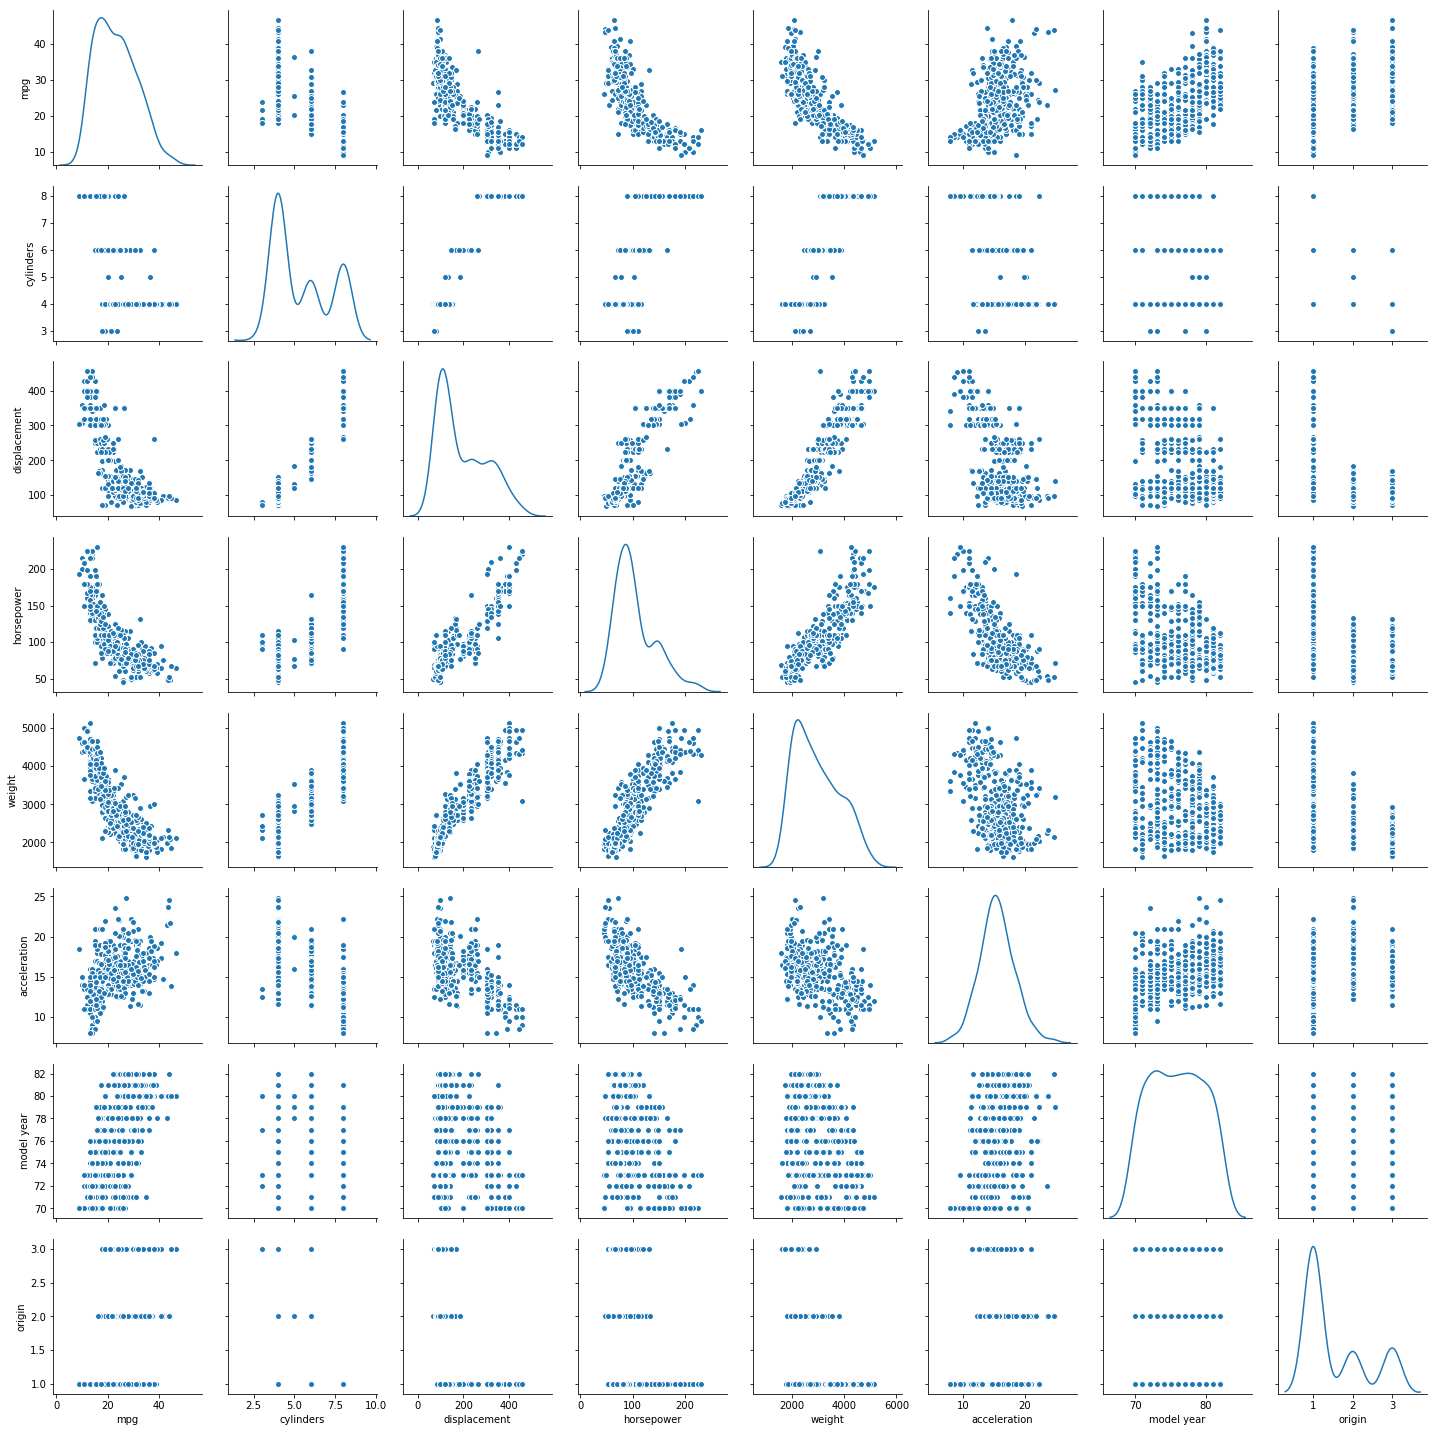

In [11]:
sns.pairplot(cars,diag_kind='kde')

In [12]:
cars.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.780424,-0.808337,-0.776466,-0.833069,0.436698,0.584194,0.567723
cylinders,-0.780424,1.000000,0.951787,0.842307,0.895220,-0.522452,-0.360762,-0.567478
displacement,-0.808337,0.951787,1.000000,0.896703,0.932475,-0.557984,-0.381714,-0.613056
horsepower,-0.776466,0.842307,0.896703,1.000000,0.864369,-0.694415,-0.421699,-0.457162
weight,-0.833069,0.895220,0.932475,0.864369,1.000000,-0.430086,-0.315389,-0.584109
acceleration,0.436698,-0.522452,-0.557984,-0.694415,-0.430086,1.000000,0.301992,0.218845
model year,0.584194,-0.360762,-0.381714,-0.421699,-0.315389,0.301992,1.000000,0.187656
origin,0.567723,-0.567478,-0.613056,-0.457162,-0.584109,0.218845,0.187656,1.000000


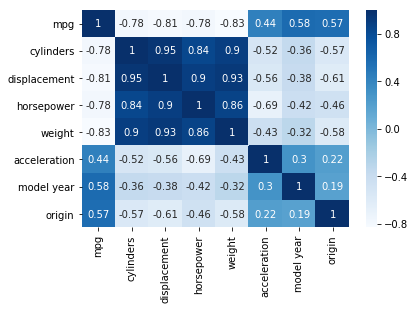

In [13]:
sns.heatmap(cars.corr(),annot=True,cmap='Blues')

In [14]:
# We can see that the variables namely cyliners, Displacement , horsepower , weight and accleration are highly correlated with MPG and so , we can use all the variables

# Q5. Perform any feature engineering/transformation and remove any duplicate or irrelevant columns

In [15]:
# Further dig into data shows max mpd is for 4 cylinders vehicles
# Origin as pointed earlier indicates production point so should be broken into dummy variables
# Year would be more effective if we can transorm this to calculate age of vehicle. This dataset was used in 1983 so we would 
         #subtract year from 83 to get the age

    


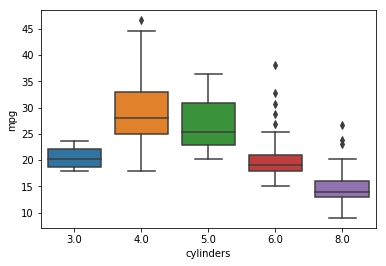

In [16]:
sns.boxplot(x='cylinders',y='mpg',data=cars)

In [17]:
origin=pd.get_dummies(cars['origin'])
origin

,1.0,2.0,3.0
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,1,0,0


In [18]:
cars['USA']=origin[1.0]
cars['Japan']=origin[2.0]
cars.drop('origin',axis=1,inplace=True)
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,USA,Japan
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,chevrolet chevelle malibu,1,0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,buick skylark 320,1,0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,plymouth satellite,1,0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,amc rebel sst,1,0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,ford torino,1,0


In [19]:
cars['model year']=83-cars['model year']

In [20]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,USA,Japan
0,18.0,8.0,307.0,130.0,3504.0,12.0,13.0,chevrolet chevelle malibu,1,0
1,15.0,8.0,350.0,165.0,3693.0,11.5,13.0,buick skylark 320,1,0
2,18.0,8.0,318.0,150.0,3436.0,11.0,13.0,plymouth satellite,1,0
3,16.0,8.0,304.0,150.0,3433.0,12.0,13.0,amc rebel sst,1,0
4,17.0,8.0,302.0,140.0,3449.0,10.5,13.0,ford torino,1,0


# Q6. Create new data frame with standardize variables and imputation for any missing/outliers

In [21]:
# Missing value check was done above and hp column was treated with median values
# Let us check for outliers now

In [22]:
cars_new=cars.drop(['car name','USA','Japan'],axis=1)

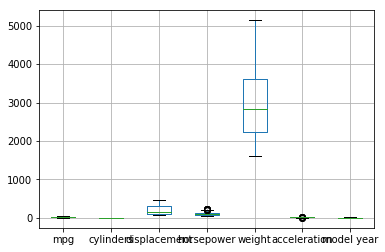

In [23]:
cars_new.boxplot()

In [24]:
from scipy.stats import zscore

In [25]:
cars_new.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year'],
      dtype='object')

In [26]:
from sklearn import preprocessing
x = cars_new
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled,columns=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year'])

In [27]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,1.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,1.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,1.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,1.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,1.0
5,0.159574,1.0,0.932817,0.826087,0.773462,0.119048,1.0
6,0.132979,1.0,0.997416,0.945652,0.777148,0.059524,1.0
7,0.132979,1.0,0.961240,0.918478,0.765240,0.029762,1.0
8,0.132979,1.0,1.000000,0.972826,0.797278,0.119048,1.0
9,0.159574,1.0,0.832041,0.782609,0.634250,0.029762,1.0


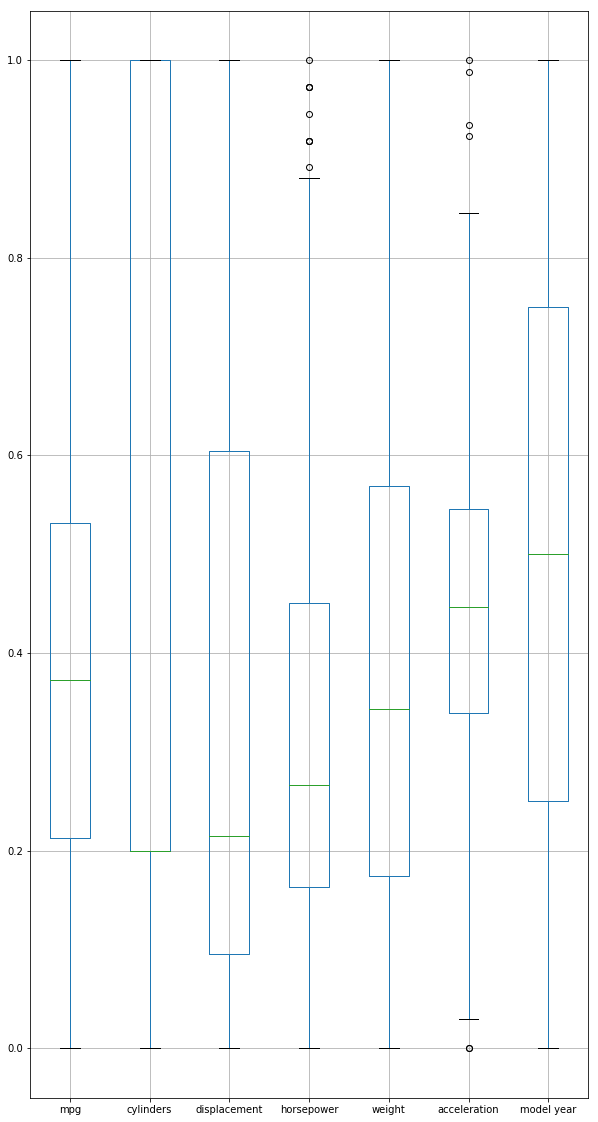

In [28]:
df.boxplot(figsize=(10,20))

In [29]:
#Q1=df.quantile(.25)
#Q3=df.quantile(.75)
#IQR=Q3-Q1

In [30]:
#df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [31]:
#df_out.boxplot(figsize=(10,20))

# Q7. Create appropriate clusters with the new data set

In [32]:
cluster_range = range( 2, 10)   
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5,random_state=1)
  clusters.fit(df)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,81.590150
1,3,57.960916
2,4,41.166765
3,5,35.161187
4,6,31.319009
5,7,27.704382
6,8,25.504724
7,9,23.925804


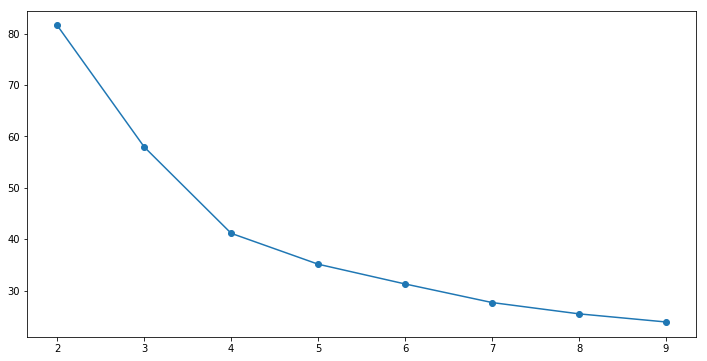

In [33]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

# Q8. Identify the appropriate clusters with result from above question

In [34]:
#The no.of Clusters is 4 from the above plot

In [35]:
cluster = KMeans( n_clusters = 4, random_state = 1 )
cluster.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

# Q9. Check for no of values in each cluster and centers for each variables. 

In [36]:
centroids = cluster.cluster_centers_
centroids

array([[0.61220767, 0.20661157, 0.11768851, 0.17103845, 0.20814871,
        0.51126525, 0.16942149],
       [0.14351064, 1.        , 0.7278553 , 0.63086957, 0.71711086,
        0.2675    , 0.72083333],
       [0.28746531, 0.63043478, 0.40133131, 0.30789225, 0.46096572,
        0.49592391, 0.49365942],
       [0.43711393, 0.19354839, 0.09737157, 0.19278869, 0.19338376,
        0.51062468, 0.72759857]])

In [37]:
centroid_df = pd.DataFrame(centroids, columns = list(df) )
centroid_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,0.612208,0.206612,0.117689,0.171038,0.208149,0.511265,0.169421
1,0.143511,1.000000,0.727855,0.630870,0.717111,0.267500,0.720833
2,0.287465,0.630435,0.401331,0.307892,0.460966,0.495924,0.493659
3,0.437114,0.193548,0.097372,0.192789,0.193384,0.510625,0.727599


# Q10. Assign the groups created above to data frame and study the characteristics  for each group.

In [38]:
prediction=cluster.predict(df)
df["GROUP"] = prediction     # Creating a new column "GROUP" which will hold the cluster id of each record
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,GROUP
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,1.0,1
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,1.0,1
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,1.0,1
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,1.0,1
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,1.0,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C4116114A8>,
      dtype=object)

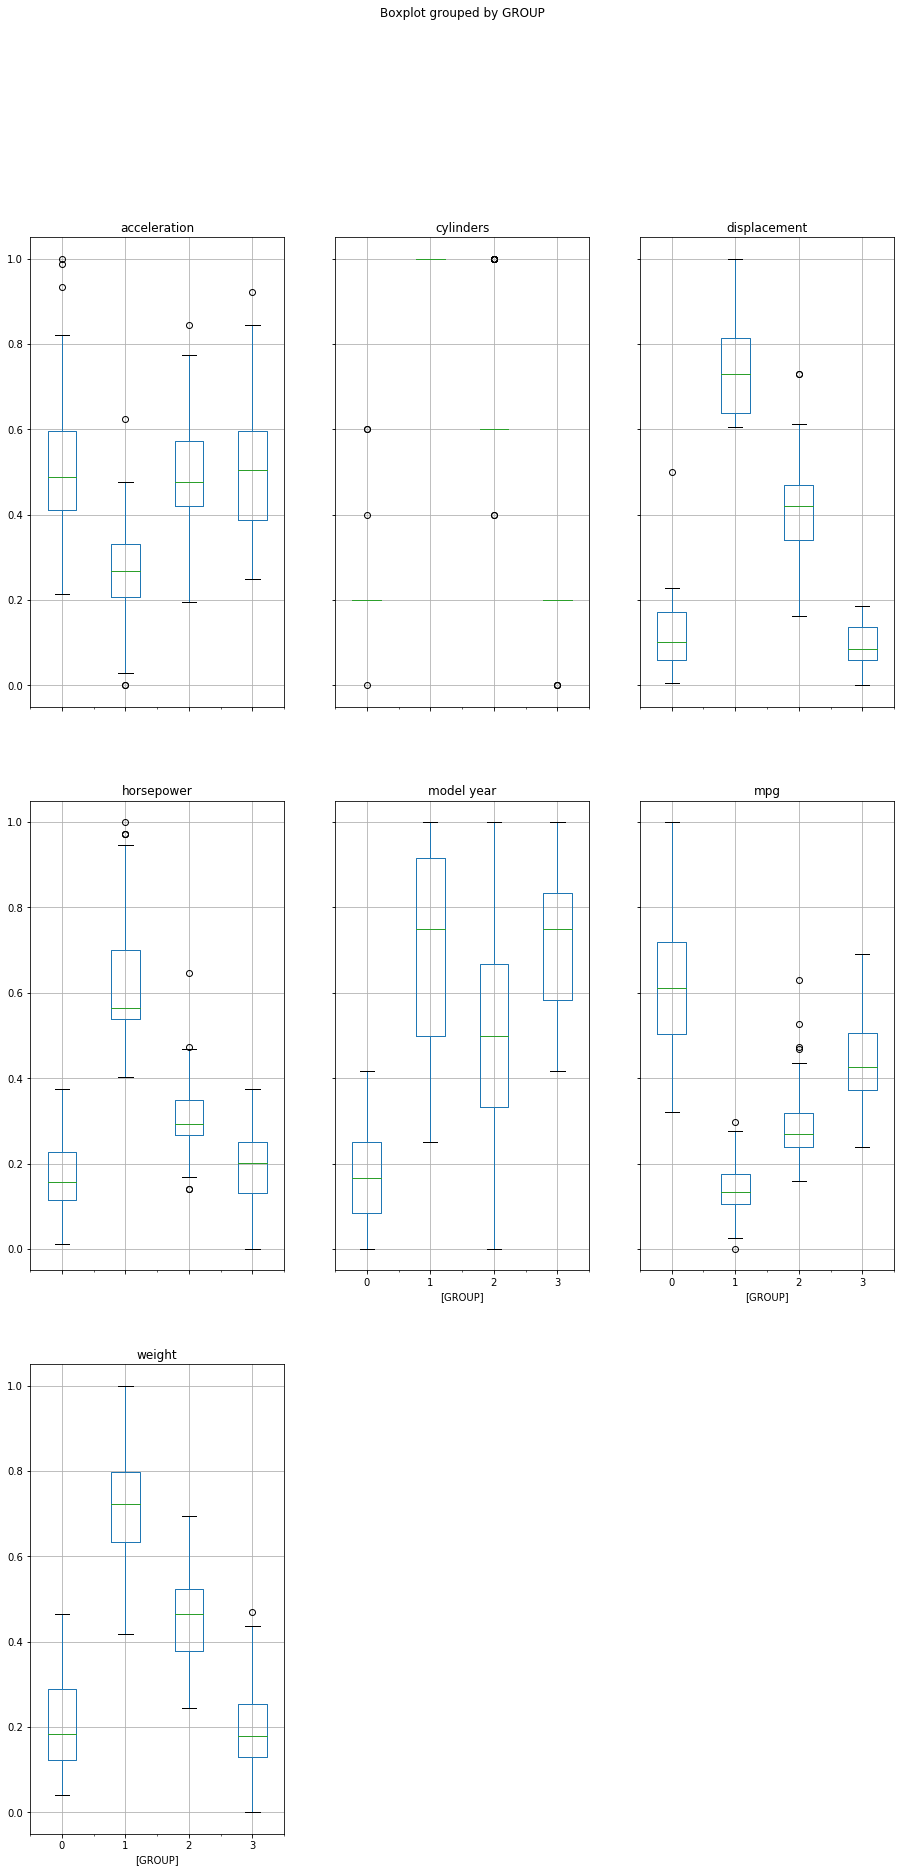

In [39]:
import matplotlib.pylab as plt

df.boxplot(by = 'GROUP',  layout=(4,3), figsize=(15, 40))


In [36]:
# Export the data into csv for any further analysis

from pandas import ExcelWriter
writer = ExcelWriter('d:\groups.xls')
df.to_excel(writer,'Sheet1')
writer.save()

In [97]:
# We can try similar analysis for 3 grps as well to check if we get more clear distinction among groups